# This Analysis is to understand the length and breadth of  given Data on a quantitative as well as qualitative standard
-  We find the number of rows and columns in both the datasets
-  We then try to preprocess the data so that only the important and relevant columns exist to save computation and space
-  We find the number of Nan values, i.e missing data to understand the quality of the datasets
-  We try to find if the data has some abnormlaity or anomaly in values
-  Finallly, we get to the point where we understand the data and move forward with Outlier Detection and Removal

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mandi_data=pd.read_csv("Monthly_data_cmo.csv")
msp_data=pd.read_csv("CMO_MSP_Mandi.csv")

# Let's look at the big Mandi Dataset, which gives monthly Data and try to hear what it says

In [4]:
mandi_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [5]:
mandi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [6]:
mandi_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


# Now, we observe the following
-  We only have data for the state of Maharashtra, so State column is evidently, of no importance to our analysis
-  Similarly, district name, but it may be useful while making decisions, so we keep it
-  We have three columns, date, year and month, which are not useful together, so we drop any one(or two)
-  We see that, date column is in object data type format, hence we convert it to  date_time
-  We see that we have no NaN values in this dataset, assuming only available data has been added 
-  Not surprising, max_price and min_price and modal_price both have '0' values, FREE, thus maybe outliers or wrong data 
-  Next up, we see that we only have 3 year data here (2014 - min, 2016- max)

# Let's look at the MSP_Data , government data that gives Minimum Support Price based on the Commodities

In [8]:
msp_data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [9]:
msp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


In [10]:
msp_data.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


# Observations-
-  'commodity' column here has a small c, thus may create problems while merging or joining data
-  All the commodities are in capital here, thus we need to  change this in both datasets to create common ground for analysis
-  Most importantly, 'msprice' has 10 missing values,evident by (145) where total length =155, big issue
-  We have government data from 2012 to 2016, thus  we have a 2 year shortage, but for comparison purposes, we may ignore it
-  'msp_filter' column has the same value everywhere, thus we can remove it

In [11]:
mandi_data.drop(labels=['state_name'],axis=1,inplace=True)
msp_data.drop(labels=['msp_filter'],axis=1,inplace=True)

In [12]:
msp_data['commodity'] = [i.lower() for i in msp_data.commodity.values]
mandi_data['Commodity'] = [i.lower() for i in mandi_data.Commodity.values]
mandi_data=mandi_data.rename(index=str, columns={"Commodity": "commodity"})

In [13]:
mandi_data['date'] = pd.to_datetime(mandi_data['date'])

In [16]:
print(len(mandi_data[mandi_data['modal_price']==0]))
print(len(mandi_data[mandi_data['min_price']==0]))
print(len(mandi_data[mandi_data['max_price']==0]))
print(len(mandi_data[mandi_data['min_price']>mandi_data['max_price']]))

204
175
35
296


# So we see, 710 rows with Logical Data Anomaly , So, we must recheck after Outlier Detection if these have been removed)

# Let's Compare the number of unique commodities in both the datasets to see if we have naming Anomalies

In [18]:
print(len(mandi_data['commodity'].unique()))
print(len(msp_data['commodity'].unique()))

204
32


# So, we may have two possibilities
-  Unavailable data for some commodities
-  Naming anomaly for some commodity

In [25]:
s1 = set(mandi_data['commodity'].unique())
s2 = set(msp_data['commodity'].unique())
s3 = s2.intersection(s1)
s4 = s2.union(s1)
print(s3)
print(len(s3))
print(s4)
print(len(s4))

{'wheat(unhusked)', 'pigeon pea (tur)', 'paddy-unhusked', 'wheat(husked)', 'spilt gerrn gram', 'split black gram', 'sorgum(jawar)', 'niger-seed', 'bajri', 'mustard', 'sunflower', 'safflower', 'sugarcane', 'maize', 'coconut', 'sesamum', 'gr.nut kernels', 'rice(paddy-hus)', 'cotton'}
19
{'ambat chuka', 'green peas (dry)', 'amla', 'mustard', 'cabbage', 'safflower', 'gram', 'cardamom', 'rala', 'jack fruit(raw)', 'other cereals', 'linseed', 'hemp', 'mint', 'farshi', 'awala', 'raddish', 'soyabean', 'sunflower', 'spilt pigeon pea', 'brinjal', 'ghosali(bhaji)', 'ladies finger', 'indian bean', 'litchi', 'karvand', 'black gram', 'cluster bean', 'split lentil', 'dhemse', 'groundnut pods (wet)', 'sarsav', 'french bean', 'jui', 'kalvad', 'sorgum(jawar)', 'ridge gourd', 'bajri', 'turmeric', 'shevga', 'parwar', 'cow', 'soybean', 'masur_yellow', 'pitch', 'papnas', 'wheat(husked)', 'ghevda seed', 'bor', 'bhagar/vari', 'batbati', 'beet root', 'sugarcane', 'jack fruit', 'tuljapuri', 'orange', 'rice(paddy

# So, we see a great deal of abnormality in the Dataset, but still, moving ahead, with fixing this as much as possible, filling the missing values

In [28]:
missing = list(msp_data.loc[msp_data.isnull().any(axis=1)]['commodity'])
print(missing)

['soyabean_black', 'soyabean_black', 'wheat(husked)', 'wheat(unhusked)', 'barli', 'gram_yellow', 'masur_yellow', 'mustard', 'safflower', 'toria_yellow']


# Fixing missing values with mean of values from the past

In [29]:
for i in range(len(missing)):
    msp_data.loc[(msp_data.commodity == missing[i]) & (msp_data.msprice.isnull()),'msprice'] = msp_data.loc[(msp_data.commodity == missing[i]),'msprice'].mean()

In [30]:
msp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
commodity    155 non-null object
year         155 non-null int64
Type         155 non-null object
msprice      155 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


# So, the missing value cells have been fixed, based on values we have from the past time series of the same commodity,we verify data and export it for further Analysis

# We now try to understand the skewness and distribution of frequencies of APMC's and Commodities in dataset

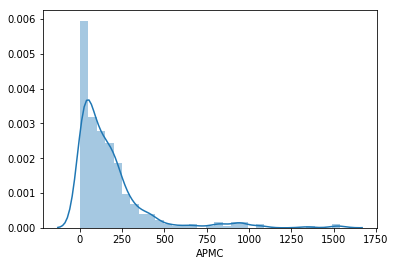

In [50]:
sns.distplot(mandi_data.APMC.value_counts())
plt.savefig('APMC_dist.png',dpi = 200)

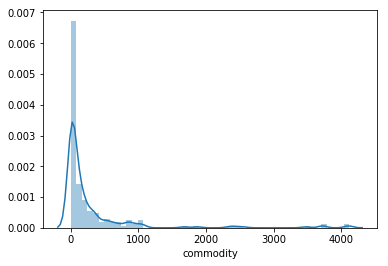

In [49]:
sns.distplot(mandi_data.commodity.value_counts())
plt.savefig('Commodity_dist.png',dpi = 200)

# Observations-
-  We find that the data for the APMC's is highly skewed
-  This implies, we have a lot of data for larger and affluent APMC's like Mumbai,Pune, Nagpur, e.t.c but not for APMC's like Biloli,Kuntur,Bhoom e.t.c, this needs to be fixed by the Government while Data Collection
-  We also see that, a greater deal of skewness exists in the commodities distribution, but that can be logically understood with supply-demand phenomenon of Districts
-  While, analysing Seasonality, we must make sure we take commodities and APMC's with sufficient values for a crisp analysis and correct detection 

# Finally,
-  We Export the datasets to be used in further Analysis


In [33]:
mandi_data.to_csv('Cleansed_mandi_data.csv')
msp_data.to_csv('Cleansed_msp_data.csv')